# Classification Problem

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline

In [17]:
nyc_taxi_with_weather=pd.read_csv('data/nyc_taxi_with_weather.csv')

In [18]:
nyc_taxi_with_weather['total_amount'].describe()

count    102521.000000
mean         21.682430
std          16.620106
min           0.300000
25%          12.403579
50%          15.300000
75%          24.206667
max         199.820000
Name: total_amount, dtype: float64

<AxesSubplot:>

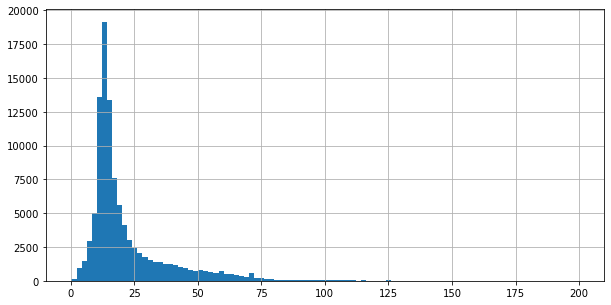

In [19]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

In [73]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class']=nyc_class['total_amount'].apply(lambda x: 'high' if x>15.5 else 'low')
nyc_class['earning_class_binary']=nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,Unnamed: 0,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0,low,0
1,1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
2,2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,low,0
3,3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,low,0
4,4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,low,0


In [74]:
nyc_class['earning_class'].value_counts()

low     52621
high    49900
Name: earning_class, dtype: int64

**The target feature is the earning class of either High or Low**

In [33]:
categorical_features = ['PULocationID','transaction_month','transaction_day','transaction_hour','transaction_week_day','weekend','is_holiday','Borough']
input_features = categorical_features + ['temperature','humidity','wind speed','cloud cover','amount of precipitation']
target_feature = 'earning_class_binary'

In [34]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.33,random_state=42)

In [75]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c=clf.predict(X_test_c)

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[ 8257  6273]
 [ 5619 13683]]
accuracy 0.6484984629936155
precision 0.6856584485868912
recall 0.7088902704382966


<AxesSubplot:>

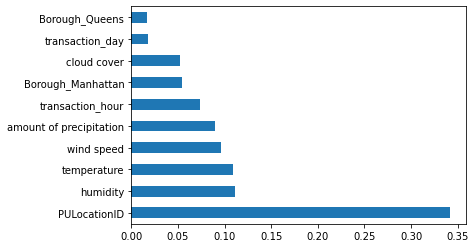

In [37]:
(pd.Series(clf.feature_importances_, index=X_train_c.columns)
   .nlargest(10)
   .plot(kind='barh'))